In [97]:
ls


 Volume in drive C is Windows
 Volume Serial Number is 4478-A11A

 Directory of C:\Users\user\Desktop\track

14/05/2019  04:10 PM    <DIR>          .
14/05/2019  04:10 PM    <DIR>          ..
14/05/2019  04:10 PM           922,264 driving_log.csv
14/05/2019  04:10 PM    <DIR>          IMG
               1 File(s)        922,264 bytes
               3 Dir(s)  13,923,258,368 bytes free


In [98]:
cd Desktop/tensorflow-self-driven-car/

[WinError 3] The system cannot find the path specified: 'Desktop/tensorflow-self-driven-car/'
C:\Users\user\Desktop\track


In [99]:
ls


 Volume in drive C is Windows
 Volume Serial Number is 4478-A11A

 Directory of C:\Users\user\Desktop\track

14/05/2019  04:10 PM    <DIR>          .
14/05/2019  04:10 PM    <DIR>          ..
14/05/2019  04:10 PM           922,264 driving_log.csv
14/05/2019  04:10 PM    <DIR>          IMG
               1 File(s)        922,264 bytes
               3 Dir(s)  13,923,241,984 bytes free


In [100]:
cd ..

C:\Users\user\Desktop


In [101]:
cd track/

C:\Users\user\Desktop\track


In [102]:
ls


 Volume in drive C is Windows
 Volume Serial Number is 4478-A11A

 Directory of C:\Users\user\Desktop\track

14/05/2019  04:10 PM    <DIR>          .
14/05/2019  04:10 PM    <DIR>          ..
14/05/2019  04:10 PM           922,264 driving_log.csv
14/05/2019  04:10 PM    <DIR>          IMG
               1 File(s)        922,264 bytes
               3 Dir(s)  13,923,241,984 bytes free


In [103]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import cv2
import pandas as pd
import ntpath
import random

In [104]:
datadir = 'C:/Users/user/Desktop/track'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names = columns)
pd.set_option('display.max_colwidth', -1)

data.head()

,center,left,right,steering,throttle,reverse,speed
0,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_382.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_382.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_670.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_724.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_792.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,C:\Users\Amer\Desktop\new_track\IMG\center_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\left_2018_07_16_17_11_43_860.jpg,C:\Users\Amer\Desktop\new_track\IMG\right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


In [105]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail
data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2018_07_16_17_11_43_382.jpg,left_2018_07_16_17_11_43_382.jpg,right_2018_07_16_17_11_43_382.jpg,0.0,0.0,0.0,0.649786
1,center_2018_07_16_17_11_43_670.jpg,left_2018_07_16_17_11_43_670.jpg,right_2018_07_16_17_11_43_670.jpg,0.0,0.0,0.0,0.627942
2,center_2018_07_16_17_11_43_724.jpg,left_2018_07_16_17_11_43_724.jpg,right_2018_07_16_17_11_43_724.jpg,0.0,0.0,0.0,0.622910
3,center_2018_07_16_17_11_43_792.jpg,left_2018_07_16_17_11_43_792.jpg,right_2018_07_16_17_11_43_792.jpg,0.0,0.0,0.0,0.619162
4,center_2018_07_16_17_11_43_860.jpg,left_2018_07_16_17_11_43_860.jpg,right_2018_07_16_17_11_43_860.jpg,0.0,0.0,0.0,0.615438


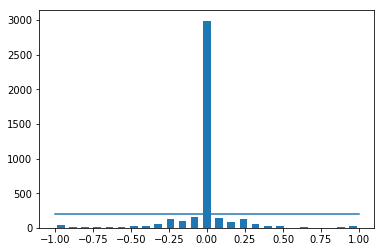

In [106]:
num_bins = 25
samples_per_bin = 200
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1]+ bins[1:]) * 0.5
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))

total data: 4053
removed: 0
remaining: 4053


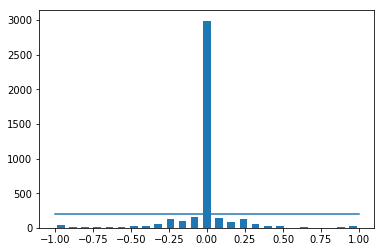

In [120]:
print('total data:', len(data))
remove_list = []
for j in range(num_bins):
    list_ = []
    for i in range(len(data['steering'])):
        if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
            list_.append(i)
        list_ = shuffle(list_)
        list_ = list_[samples_per_bin:]
        remove_list.extend(list_)
        
print('removed:', len(remove_list)) 
data.drop(data.index[remove_list], inplace=True)
print('remaining:', len(data))

hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot((np.min(data['steering']), np.max(data['steering'])), (samples_per_bin, samples_per_bin))       
        

In [145]:
print(data.iloc[1])
def load_img_steering(datadir, df):
    image_path = []
    steering = []
    for i in range(len(data)):
        indexed_data = data.iloc[i]
        center, left, right = indexed_data[0], indexed_data[1], indexed_data[2]
        image_path.append(os.path.join(datadir, center.strip()))
        steering.append(float(indexed_data[3]))
    image_paths = np.asarray(image_path)
    steering = np.asarray(steering)
    return image_paths, steering
image_paths, steering = load_img_steering(datadir + '\IMG', data)

center      center_2018_07_16_17_11_43_670.jpg
left        left_2018_07_16_17_11_43_670.jpg  
right       right_2018_07_16_17_11_43_670.jpg 
steering    0                                 
throttle    0                                 
reverse     0                                 
speed       0.627942                          
Name: 1, dtype: object


In [146]:
x_train, x_valid, y_train, y_valid = train_test_split(image_paths, steering, test_size=0.2, random_state=6)
print('Traning Samples: {}\nValid Samples: {}'.format(len(x_train), len(x_valid)))

Traning Samples: 3242
Valid Samples: 811


Text(0.5, 1.0, 'Validation set')

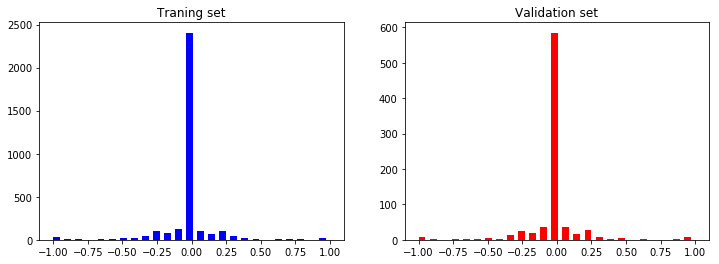

In [147]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
axes[0].hist(y_train, bins = num_bins, width=0.05, color='blue')
axes[0].set_title('Traning set')
axes[1].hist(y_valid, bins=num_bins, width=0.05, color='red')
axes[1].set_title('Validation set')


In [148]:
def img_preprocess(img):
    img = mpimg.imread(img)
    return img

In [144]:
image = image_paths[100]
original_image = mpimg.imread(image)
preprocessed_image = img_preprocess(image)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('Original Image')
axs[1].imshow(original_image)
axs[1].set_title('Preprocessed Image')


OSError: [Errno 22] Invalid argument: 'C:/Users/user/Desktop/trackC:/Users/user/Desktop/track/IMG\\center_2018_07_16_17_11_51_122.jpg'